# Scenario Analysis: US Election and Rates Cuts 2024

Investors are (at least I am) grappling with what a second Trump presidency would mean for the US economy, the Federal Reserve and interest rates, even as they also weigh the possibility that vice-president Kamala Harris might turn the tables.  

Many investors assume that, once in the office, Trump would then press the Fed to lower rates.   

The Fed does not know who will win, has no edge in judging what will be implemented, and will be keenly aware of the difficulty of modelling both the mechanical impacts and the effects on animal spirits and risk premia. It will not want to look as if it is prejudging Trump policies as inflationary during election season. Helpfully, bond yields are doing some of its work for it, moving higher when Trump victory odds improve, which leans against overheating. 

On current information, well positioned in mid-2025 might mean a rate in the 4 to 4.5 per cent range — significantly below the current 5.25 to 5.5 per cent rate, but still a bit restrictive.   

If incoming shocks are inflationary or inflation a bit sticky, the Fed could then go on hold, and even tap the brakes with a rise at the end of 2025 if needed. If incoming shocks and data are not inflationary, it could continue cutting, or even speed up. If we pencil in two cuts under the new president in the first half of 2025, that leaves scope for two, possibly three cuts over the rest of 2024.  

This notebook tries to analyze the impact of different scenario after November 2024 to medium term US treasuries (5 to 7 years).  

Reference articles:  
[The Fed’s dilemma on Trump](https://www.ft.com/content/d20fac20-cb21-41dc-a7f9-7b116d9d9b1a)  
[Donald Trump versus the Fed](https://www.ft.com/content/5e93eb6f-faf0-42eb-8407-8a899e73ba38)   
[Donald Trump warns US Fed chair not to cut rates before the election](https://www.ft.com/content/11bc931f-5c5e-4e3c-9ceb-9bdca25430ad)

2024 US election: November 5  
Upcoming FOMC meetings: September 17 and November 6  

Update: 2024-7-31 file created  
treasuries quotes (treasuries_20240730.txt) source: https://github.com/lcs-w/treasuries-quotes-scraper

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("vlag"))

In [63]:
%load_ext autoreload
%autoreload 2
from utilities_hull_white import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# select sample
sample_bonds = pd.read_csv("treasuries_20240730.txt", sep="\t")
sample_bonds["MATURITY"] = pd.to_datetime(sample_bonds["MATURITY"])

# bonds mature in 5 to 7 years for simplicity
sample_bonds = sample_bonds[(sample_bonds["MATURITY"] > "2029-10-31") & (sample_bonds["MATURITY"] <= "2031-10-1")]

# sample_bonds = sample_bonds[sample_bonds["MATURITY"].dt.is_month_end]
sample_bonds["MATURITY_day"] = sample_bonds["MATURITY"].dt.day # almost a third of the treasuries mature in the middle of the month

# for simplicity, align all maturiy to the month end !!
sample_bonds["MATURITY"] += pd.offsets.MonthEnd(0)

sample_bonds

,MATURITY,COUPON,BID,ASKED,CHG,ASKED YIELD,MATURITY_day
218,2029-11-30,1.750,89.080,89.094,0.0440,4.015,15
219,2029-11-30,3.875,99.036,99.052,0.7300,4.050,30
220,2029-12-31,3.875,99.022,99.036,0.7220,4.058,31
221,2030-01-31,3.500,97.080,97.094,0.0580,4.053,31
222,2030-02-28,1.500,87.114,87.130,0.0480,4.061,15
223,2030-02-28,4.000,99.216,99.232,0.0540,4.055,28
224,2030-03-31,3.625,97.240,97.254,0.0440,4.063,31
225,2030-04-30,3.500,97.036,97.052,0.7320,4.057,30
226,2030-05-31,0.625,82.132,82.146,0.0560,4.053,15
227,2030-05-31,6.250,111.056,111.072,0.7400,4.054,15


In [34]:
sample_bonds.dtypes

MATURITY        datetime64[ns]
COUPON                 float64
BID                    float64
ASKED                  float64
CHG                     object
ASKED YIELD            float64
MATURITY_day             int32
dtype: object

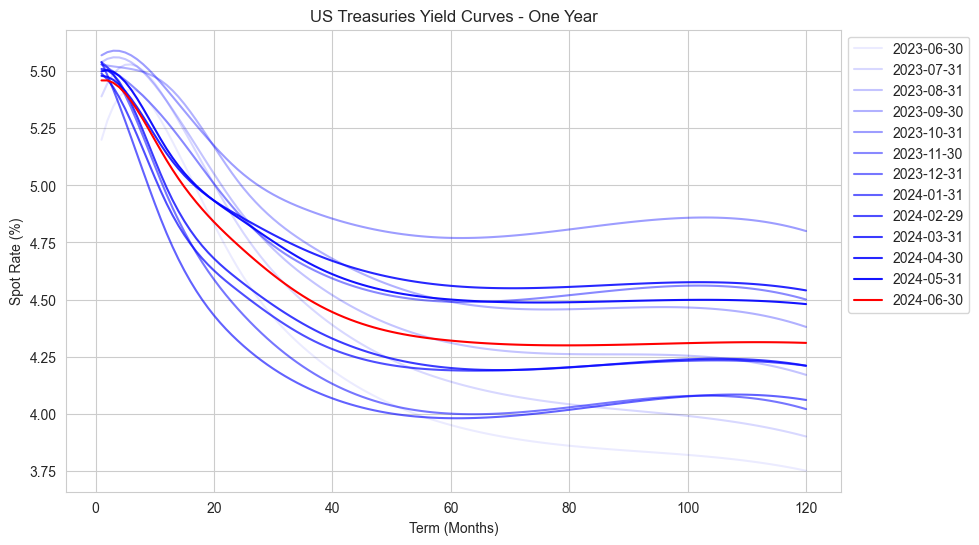

In [3]:
monthly_spot_rate = cs_interpolate(get_spot_curve("6/1/2023"))

fig_term_structure, ax = plt.subplots(figsize=(10, 6))
for _i, (_index, _row) in enumerate(monthly_spot_rate.iterrows()):
    if _index == monthly_spot_rate.index.max():
        color = "red"
    else:
        color = "blue"
    ax.plot(
        _row.index,
        _row.values * 100,
        color=color,
        alpha=(_i + 1) / len(monthly_spot_rate),  # latest date has the deepest color
        label=_index.date(),
    )


ax.set_title("US Treasuries Yield Curves - One Year")
ax.set_xlabel("Term (Months)")
ax.set_ylabel("Spot Rate (%)")
ax.legend(loc="best", bbox_to_anchor=(1, 1))

In [4]:
# the spot curve on 2024-1-31 is used here
spot_curve = monthly_spot_rate.loc["2024-6-30"]
instantaneous_fr = get_inst_fr(spot_curve, delta_t=1 / 12)

_, _, short_rates = hw(spot_curve, n=3)

### Price the bonds with today's rates

In [58]:
# four arguments are needed to call get_fixed_rate_bond_price if we are pricing the bonds today (t=0)
# spot_curve, maturity_date (in months), coupon_rate (in percentage point), next_payment (in months)
# a new function is needed to determine each argument for each bonds, since there are 31 in the sample.

def get_month_diff(maturity: np.datetime64, t: np.datetime64) -> int:
    """_summary_

    Args:
        maturity (np.datetime64): _description_
        t (np.datetime64): _description_

    Returns:
        int: _description_
    """
    m = (maturity.year - t.year) * 12 + maturity.month - t.month
    return m


def get_next_payment_in_month(maturity: np.datetime64, t: np.datetime64) -> int:

    # there is always a coupon payment on maturity
    payment_date = maturity
    while payment_date - pd.DateOffset(months=6) > t:
        payment_date -= pd.DateOffset(months=6)
        # payment_date += pd.offsets.MonthEnd(0)
    
    return get_month_diff(payment_date, t,)

t = pd.to_datetime("2024-7-31")
maturity = pd.to_datetime("2029-11-30")
next_payment =  get_next_payment_in_month(maturity, t)
maturity_date_in_month = get_month_diff(maturity, t)

print(maturity_date_in_month)
print(next_payment)

print((maturity_date_in_month - next_payment) % 6)

64
4
0


In [75]:
t = pd.to_datetime("2024-7-31")
instantaneous_fr, _, short_rates = hw(spot_curve, n=10, seed=123)

predictions = []

for _i, row in sample_bonds.iterrows():
    predicted_p = get_fixed_rate_bond_price(
        spot_curve=spot_curve, 
        instantaneous_fr = instantaneous_fr,
        short_rates = short_rates,
        maturity_date=get_month_diff(row["MATURITY"], t),
        coupon_rate=row["COUPON"],
        next_payment=get_next_payment_in_month(row["MATURITY"], t)
        )
    # print(round(predicted_p, 4))
    diff_bid = (predicted_p - row["BID"]) / row["BID"] *100
    # print("difference with bid price: {:.2f}%".format(diff_bid))
    predictions.append((predicted_p, diff_bid, row["MATURITY_day"]))

pred_df = pd.DataFrame(predictions, columns=["price", "diff_bid", "MATURITY_day"])


Text(0.5, 1.0, 'Difference: calculated price vs quotes in %')

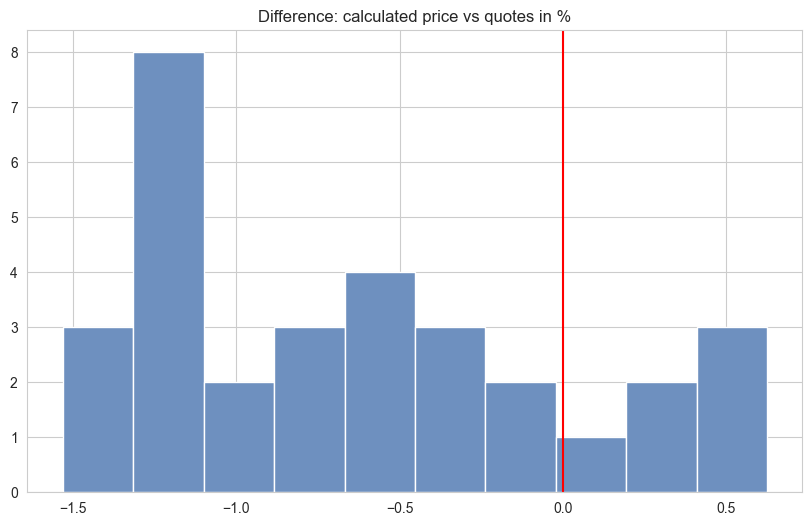

In [81]:
fig_pre_diff, ax = plt.subplots(figsize=(10, 6))
ax.hist(pred_df["diff_bid"], bins=10)
ax.axvline(x=0, color="r")
ax.set_title("Difference: calculated price vs quotes in %")

Clearly prices are under calculated with the yield curve from July 2024.  

My guess is bonds tend to be priced cheaper when the market thinks Trump has more change to win the election.  

